In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from pathlib import Path
#import geopandas as gpd

import os
import requests, zipfile, io
import gc
import warnings
warnings.filterwarnings('ignore')

In [13]:
# df1 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detected_1.csv')
# df2 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detected_2.csv')
# df3 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detected_3.csv')
# pdList = [df1, df2, df3]  # List of your dataframes
# df = pd.concat(pdList)
# #df.head()
# df

csv_path = Path("C:/Users/aravi/Downloads/out.csv")
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,date,month,day of week
0,2,2021-10-04 14:16:03,37.866789,122.254125,17.7027,GRMN_Bancroft_0.MP4,GRMN_Bancroft_0_171.jpg,bus,1,0.021615,0.433333,0.043229,0.235185,0.688805,2021-10-04 14:16:03,10,0
1,4,2021-10-04 14:16:05,37.866919,122.254153,20.9214,GRMN_Bancroft_0.MP4,GRMN_Bancroft_0_218.jpg,bus,1,0.032292,0.405093,0.021875,0.047222,0.539737,2021-10-04 14:16:05,10,0
2,10,2021-10-04 14:16:58,37.869214,122.254575,9.6560,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_17.jpg,ups_truck,5,0.513542,0.602778,0.077083,0.151852,0.529567,2021-10-04 14:16:58,10,0
3,11,2021-10-04 14:16:58,37.869214,122.254575,9.6560,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_18.jpg,ups_truck,5,0.515365,0.603241,0.072396,0.150926,0.617564,2021-10-04 14:16:58,10,0
4,13,2021-10-04 14:16:58,37.869214,122.254575,9.6560,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_25.jpg,ups_truck,5,0.528125,0.600463,0.083333,0.149074,0.670175,2021-10-04 14:16:58,10,0


In [14]:
df['time'] = pd.to_datetime(df['time'])
df = df[df['confidences']>=0.85]
df= df[df['latitude'] < 180]
df= df[df['longitude'] < 180]
df['longitude'] = df['longitude']*-1
#df = df[df["obj_class_name"].str.contains("bus")==False]
df['box_area'] = df['w'] * df['h'] 
df.head()

,Unnamed: 0,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,date,month,day of week,box_area
46,84,2021-10-04 14:17:13,37.869236,-122.255339,19.3121,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_461.jpg,fedex_truck,4,0.635938,0.623611,0.092708,0.134259,0.879880,2021-10-04 14:17:13,10,0,0.012447
47,85,2021-10-04 14:17:13,37.869236,-122.255339,19.3121,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_462.jpg,fedex_truck,4,0.638802,0.624537,0.091146,0.132407,0.880430,2021-10-04 14:17:13,10,0,0.012068
48,86,2021-10-04 14:17:13,37.869236,-122.255339,19.3121,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_463.jpg,fedex_truck,4,0.640365,0.625463,0.090104,0.130556,0.878385,2021-10-04 14:17:13,10,0,0.011764
50,88,2021-10-04 14:17:13,37.869236,-122.255339,19.3121,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_465.jpg,fedex_truck,4,0.641406,0.627315,0.096354,0.139815,0.866673,2021-10-04 14:17:13,10,0,0.013472
62,103,2021-10-04 14:17:13,37.869236,-122.255339,19.3121,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_477.jpg,fedex_truck,4,0.663281,0.634259,0.114063,0.164815,0.907289,2021-10-04 14:17:13,10,0,0.018799


In [15]:
df['is_on_bus_line'] = (df['longitude'] <= -122.258329) & (df['x'] > 0.5) & (df['obj_class_name'] != 'bus' )
df[(df['is_on_bus_line'] == True)]



,Unnamed: 0,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,date,month,day of week,box_area,is_on_bus_line
2459,4768,2021-11-15 16:52:55,37.868586,-122.260600,20.9214,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1735.jpg,amazon_truck,6,0.745052,0.462963,0.217187,0.185185,0.861539,2021-11-15 16:52:55,11,0,0.040220,True
2468,4777,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1744.jpg,amazon_truck,6,0.773958,0.471296,0.236458,0.196296,0.852147,2021-11-15 16:52:56,11,0,0.046416,True
2469,4778,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1745.jpg,amazon_truck,6,0.776563,0.471759,0.239583,0.200926,0.857969,2021-11-15 16:52:56,11,0,0.048139,True
2473,4782,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1749.jpg,amazon_truck,6,0.790625,0.475926,0.245833,0.207407,0.877438,2021-11-15 16:52:56,11,0,0.050988,True
2474,4783,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1750.jpg,amazon_truck,6,0.795833,0.476852,0.240625,0.212963,0.898165,2021-11-15 16:52:56,11,0,0.051244,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530320,687202,2021-10-04 19:49:33,37.868700,-122.259406,12.8747,GRMN_Bancroft_98.MP4,GRMN_Bancroft_98_454.jpg,amazon_truck,6,0.857552,0.563426,0.277604,0.689815,0.914223,2021-10-04 19:49:33,10,0,0.191495,True
1530322,687204,2021-10-04 19:49:33,37.868700,-122.259406,12.8747,GRMN_Bancroft_98.MP4,GRMN_Bancroft_98_455.jpg,amazon_truck,6,0.860156,0.556944,0.273438,0.704630,0.905813,2021-10-04 19:49:33,10,0,0.192672,True
1530323,687205,2021-10-04 19:49:33,37.868700,-122.259406,12.8747,GRMN_Bancroft_98.MP4,GRMN_Bancroft_98_456.jpg,amazon_truck,6,0.860417,0.558333,0.272917,0.701852,0.860947,2021-10-04 19:49:33,10,0,0.191547,True
1530325,687207,2021-10-04 19:49:33,37.868700,-122.259406,12.8747,GRMN_Bancroft_98.MP4,GRMN_Bancroft_98_457.jpg,amazon_truck,6,0.864062,0.553704,0.266667,0.707407,0.854345,2021-10-04 19:49:33,10,0,0.188642,True


In [16]:
# remove duplicate
df = df.loc[df.groupby(['time', 'original_file', "obj_class_name"])['box_area'].idxmax()]


# remove zero speed
df = df[df['speed'] != 0]

# # speed unit from km/h to m/s
# df['speed_mps'] = df['speed']/3.6

# # normalize count
# # Assume that the camera can see up to 20 meters
# # in GRMN_Bancroft_48.MP4 there are 4 second contains fedex and the speed is 20 km/h
# # 4* (20/3.6) = 20 
# #df[df['original_file'] == 'GRMN_Bancroft_48.MP4']
# #print(df[df['obj_class_name'] == 'fedex_truck']['original_file'])
# max_seen = 20
# df['normalized_count'] = df['speed_mps']/max_seen


#df.to_csv('filtered_out.csv') 

In [17]:
df['should_keep'] = False

## remove duplicate
splits = list(df.groupby(["original_file", "obj_class_name"]))
results = []

for split in splits:
    frame = split[1]
    n = frame.shape[0]
    i = 0
    while i < n:
        current = frame.iloc[i]
        if i + 1 < n:
            next = frame.iloc[i + 1]
            if (pd.Timedelta(next['time'] - current['time']).seconds) > 3:
                frame.iloc[i, df.columns.get_loc('should_keep')] = True
        else:
            frame.iloc[i, df.columns.get_loc('should_keep')] = True
        
        i += 1
    frame = frame[frame['should_keep'] == True]
    results.append(frame)


df = pd.concat(results)
        
df = df.drop(['Unnamed: 0', 'should_keep', 'day of week', 'month', 'date'], axis=1)
df

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,box_area,is_on_bus_line
76,2021-10-04 14:17:14,37.869228,-122.255411,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_492.jpg,fedex_truck,4,0.700000,0.645833,0.146875,0.217593,0.867439,0.031959,False
134,2021-10-04 14:17:25,37.869117,-122.256217,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_827.jpg,fedex_truck,4,0.832812,0.687500,0.334375,0.452778,0.862031,0.151398,False
1958,2021-11-15 16:25:17,37.868503,-122.260597,11.2654,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_631.jpg,bus,1,0.916927,0.526852,0.161979,0.766667,0.878205,0.124184,False
2021,2021-11-15 16:25:26,37.868431,-122.261094,24.1401,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_900.jpg,fedex_truck,4,0.082813,0.485648,0.165625,0.476852,0.897188,0.078979,False
2501,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1777.jpg,amazon_truck,6,0.868229,0.483333,0.263542,0.307407,0.856841,0.081015,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544324,2021-11-15 15:52:50,37.868494,-122.261072,12.8747,GRMN_Bancroft_994.MP4,GRMN_Bancroft_994_1685.jpg,fedex_truck,4,0.084635,0.483796,0.169271,0.475000,0.900096,0.080404,False
1544303,2021-11-15 15:52:42,37.868539,-122.260669,17.7027,GRMN_Bancroft_994.MP4,GRMN_Bancroft_994_1440.jpg,ups_truck,5,0.347135,0.438426,0.084896,0.163889,0.851334,0.013913,False
1544788,2021-11-15 16:19:25,37.867111,-122.254083,17.7027,GRMN_Bancroft_996.MP4,GRMN_Bancroft_996_888.jpg,bus,1,0.401823,0.442593,0.040104,0.085185,0.858605,0.003416,False
1545035,2021-11-15 16:20:19,37.869236,-122.254972,16.0934,GRMN_Bancroft_997.MP4,GRMN_Bancroft_997_690.jpg,bus,1,0.820312,0.521296,0.359375,0.748148,0.873917,0.268866,False


In [18]:
# add date week and hour info
date = pd.to_datetime(df['time']).dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
df['year'] = date.dt.year
df['month'] = date.dt.month
df['day'] = date.dt.day
df['weekday'] = date.dt.weekday + 1
df['hour'] = date.dt.hour
df['date'] = date.dt.date

In [19]:
df.to_csv('filtered_out.csv', index=False) 

In [20]:
total_count = df['obj_class_name'].value_counts()
total_count

bus             2114
fedex_truck      621
amazon_truck     475
ups_truck        217
Name: obj_class_name, dtype: int64

In [21]:
on_bus_line = df[(df['is_on_bus_line'] == True)]['obj_class_name'].value_counts()
display(on_bus_line)
on_bus_line/total_count

fedex_truck     133
amazon_truck     85
ups_truck        51
Name: obj_class_name, dtype: int64

amazon_truck    0.178947
bus                  NaN
fedex_truck     0.214171
ups_truck       0.235023
Name: obj_class_name, dtype: float64

In [22]:

#df[['date', 'normalized_count', 'obj_class_name']].groupby(['date', 'obj_class_name']).count()


,date,obj_class_name,count
0,2021-10-04,amazon_truck,7
1,2021-10-04,bus,95
2,2021-10-04,fedex_truck,47
3,2021-10-04,ups_truck,17
4,2021-10-05,bus,15
...,...,...,...
106,2021-12-14,ups_truck,7
107,2021-12-15,amazon_truck,7
108,2021-12-15,bus,43
109,2021-12-15,fedex_truck,12


Text(0.5, 1.0, 'Average of different types of vehicles dashcam detected per day')

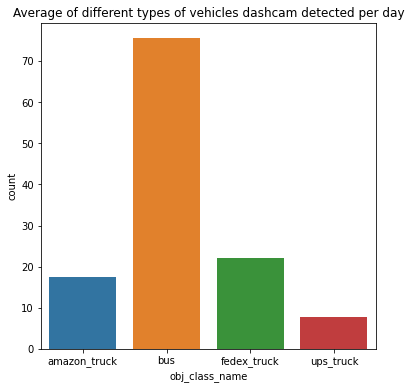

In [24]:
count = df[['date', 'obj_class_name', 'obj_class']].groupby(['date', 'obj_class_name']).count().reset_index().rename(columns={'obj_class':'count'})
display(count)

plt.figure(figsize=(6, 6))

sns.barplot(x="obj_class_name", y="count", data=count.groupby('obj_class_name').mean().reset_index(), capsize=.2)
plt.title('Average of different types of vehicles dashcam detected per day')

In [25]:
# display(df['latitude'].value_counts())
# display(df['longitude'].value_counts())

Text(0.5, 1.0, 'Hourly distribution of different types of vehicles')

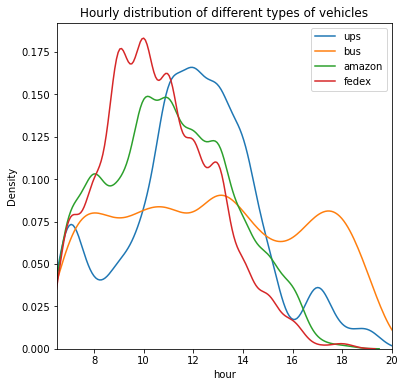

In [26]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name']].query("obj_class_name == 'ups_truck'")
bus = df[['hour', 'obj_class_name']].query("obj_class_name == 'bus'")
amazon = df[['hour', 'obj_class_name']].query("obj_class_name == 'amazon_truck'")
fedex = df[['hour', 'obj_class_name']].query("obj_class_name == 'fedex_truck'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles')

<AxesSubplot:xlabel='hour', ylabel='Density'>

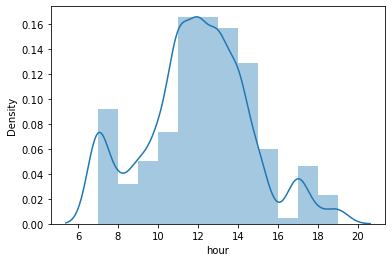

In [27]:
sns.distplot(ups['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='ups')

<AxesSubplot:xlabel='hour', ylabel='Density'>

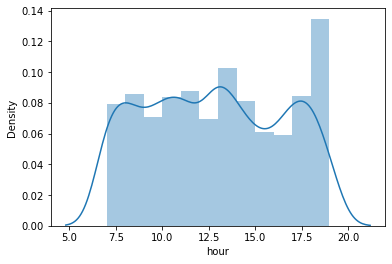

In [28]:
sns.distplot(bus['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='bus')

<AxesSubplot:xlabel='hour', ylabel='Density'>

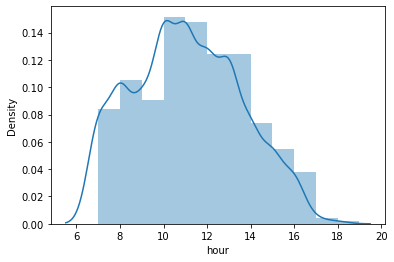

In [29]:
sns.distplot(amazon['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='amazon')

<AxesSubplot:xlabel='hour', ylabel='Density'>

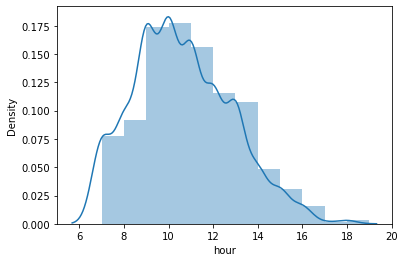

In [30]:
sns.distplot(fedex['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='fedex')

Text(0.5, 1.0, 'Weekday distribution of different types of vehicles')

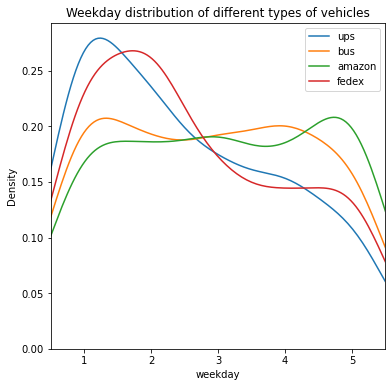

In [31]:
plt.figure(figsize=(6, 6))
ups = df[['weekday', 'obj_class_name']].query("obj_class_name == 'ups_truck'")
bus = df[['weekday', 'obj_class_name']].query("obj_class_name == 'bus'")
amazon = df[['weekday', 'obj_class_name']].query("obj_class_name == 'amazon_truck'")
fedex = df[['weekday', 'obj_class_name']].query("obj_class_name == 'fedex_truck'")


sns.kdeplot(data = ups['weekday'], bw=0.4, label='ups')
sns.kdeplot(data = bus['weekday'], bw=0.4, label='bus')
sns.kdeplot(data = amazon['weekday'], bw=0.4, label='amazon')
sns.kdeplot(data = fedex['weekday'], bw=0.4, label='fedex')
plt.xlim([0.5, 5.5])
plt.legend();
plt.title('Weekday distribution of different types of vehicles')

Text(0.5, 1.0, 'Longitude distribution of different types of vehicles')

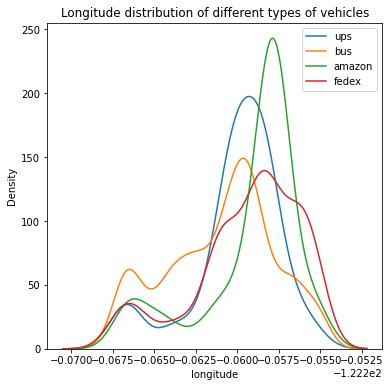

In [32]:
plt.figure(figsize=(6, 6))
l_filter = df[df['longitude'] <= -122.255]
ups = l_filter[['longitude', 'obj_class_name']].query("obj_class_name == 'ups_truck'")
bus = l_filter[['longitude', 'obj_class_name']].query("obj_class_name == 'bus'")
amazon = l_filter[['longitude', 'obj_class_name']].query("obj_class_name == 'amazon_truck'")
fedex = l_filter[['longitude', 'obj_class_name']].query("obj_class_name == 'fedex_truck'")

sns.kdeplot(data = ups['longitude'],  label='ups')
sns.kdeplot(data = bus['longitude'],  label='bus')
sns.kdeplot(data = amazon['longitude'],  label='amazon')
sns.kdeplot(data = fedex['longitude'],  label='fedex')
plt.legend();
plt.title('Longitude distribution of different types of vehicles')

In [34]:
df.head()
df_with_side_of_road = df
conditions = [
    (df_with_side_of_road['x'] <= 0.45),
    (df_with_side_of_road['x'] >= 0.55)]
choices = ['left', 'right']
df_with_side_of_road['side_of_road'] = np.select(conditions, choices, default='none')

In [35]:
df_with_side_of_road.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,...,confidences,box_area,is_on_bus_line,year,month,day,weekday,hour,date,side_of_road
76,2021-10-04 14:17:14,37.869228,-122.255411,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_492.jpg,fedex_truck,4,0.700000,0.645833,...,0.867439,0.031959,False,2021,10,4,1,7,2021-10-04,right
134,2021-10-04 14:17:25,37.869117,-122.256217,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_827.jpg,fedex_truck,4,0.832812,0.687500,...,0.862031,0.151398,False,2021,10,4,1,7,2021-10-04,right
1958,2021-11-15 16:25:17,37.868503,-122.260597,11.2654,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_631.jpg,bus,1,0.916927,0.526852,...,0.878205,0.124184,False,2021,11,15,1,8,2021-11-15,right
2021,2021-11-15 16:25:26,37.868431,-122.261094,24.1401,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_900.jpg,fedex_truck,4,0.082813,0.485648,...,0.897188,0.078979,False,2021,11,15,1,8,2021-11-15,left
2501,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1777.jpg,amazon_truck,6,0.868229,0.483333,...,0.856841,0.081015,True,2021,11,15,1,8,2021-11-15,right


In [36]:
on_the_left = df[(df['side_of_road'] == "left")]['obj_class_name'].value_counts()
display(on_the_left)


bus             892
fedex_truck     244
amazon_truck    171
ups_truck       134
Name: obj_class_name, dtype: int64

In [40]:
on_the_right = df[(df['side_of_road'] == "right")]['obj_class_name'].value_counts()
display(on_the_right)

bus             631
fedex_truck     355
amazon_truck    296
ups_truck        76
Name: obj_class_name, dtype: int64

In [41]:
df.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,...,confidences,box_area,is_on_bus_line,year,month,day,weekday,hour,date,side_of_road
76,2021-10-04 14:17:14,37.869228,-122.255411,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_492.jpg,fedex_truck,4,0.700000,0.645833,...,0.867439,0.031959,False,2021,10,4,1,7,2021-10-04,right
134,2021-10-04 14:17:25,37.869117,-122.256217,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_827.jpg,fedex_truck,4,0.832812,0.687500,...,0.862031,0.151398,False,2021,10,4,1,7,2021-10-04,right
1958,2021-11-15 16:25:17,37.868503,-122.260597,11.2654,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_631.jpg,bus,1,0.916927,0.526852,...,0.878205,0.124184,False,2021,11,15,1,8,2021-11-15,right
2021,2021-11-15 16:25:26,37.868431,-122.261094,24.1401,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_900.jpg,fedex_truck,4,0.082813,0.485648,...,0.897188,0.078979,False,2021,11,15,1,8,2021-11-15,left
2501,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1777.jpg,amazon_truck,6,0.868229,0.483333,...,0.856841,0.081015,True,2021,11,15,1,8,2021-11-15,right


Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the left side of the road')

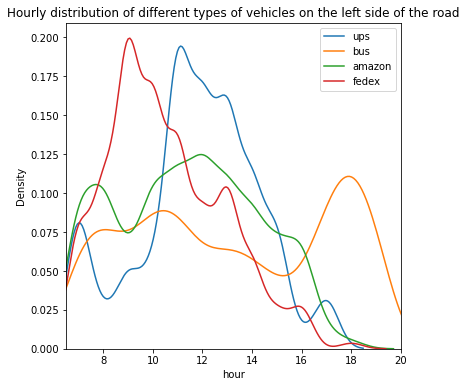

In [42]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'left'")
bus = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'left'")
amazon = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left'")
fedex = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the left side of the road')

Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the right side of the road')

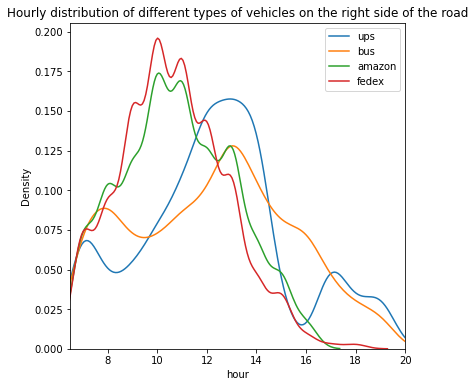

In [43]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'right'")
bus = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'right'")
amazon = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right'")
fedex = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'right'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the right side of the road')

Text(0.5, 1.0, 'Weekday distribution of different types of vehicles on the left side of the road')

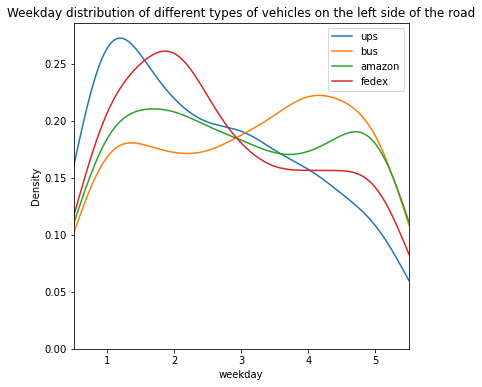

In [45]:
plt.figure(figsize=(6, 6))
ups = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'left'")
bus = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'left'")
amazon = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left'")
fedex = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left'")


sns.kdeplot(data = ups['weekday'], bw=0.4, label='ups')
sns.kdeplot(data = bus['weekday'], bw=0.4, label='bus')
sns.kdeplot(data = amazon['weekday'], bw=0.4, label='amazon')
sns.kdeplot(data = fedex['weekday'], bw=0.4, label='fedex')
plt.xlim([0.5, 5.5])
plt.legend();
plt.title('Weekday distribution of different types of vehicles on the left side of the road')

Text(0.5, 1.0, 'Weekday distribution of different types of vehicles on the right side of the road')

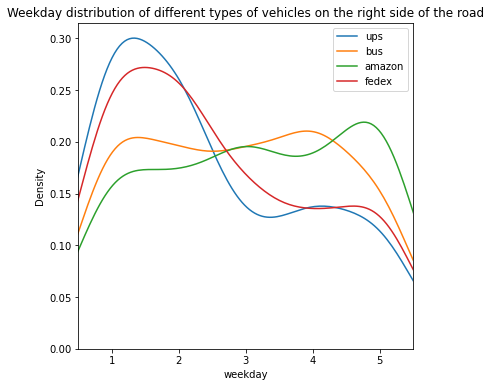

In [46]:
plt.figure(figsize=(6, 6))
ups = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'right'")
bus = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'right'")
amazon = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right'")
fedex = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'right'")


sns.kdeplot(data = ups['weekday'], bw=0.4, label='ups')
sns.kdeplot(data = bus['weekday'], bw=0.4, label='bus')
sns.kdeplot(data = amazon['weekday'], bw=0.4, label='amazon')
sns.kdeplot(data = fedex['weekday'], bw=0.4, label='fedex')
plt.xlim([0.5, 5.5])
plt.legend();
plt.title('Weekday distribution of different types of vehicles on the right side of the road')

Text(0.5, 1.0, 'Longitude distribution of different types of vehicles on the left side of the road')

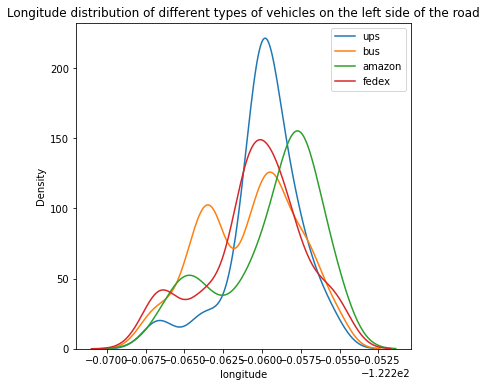

In [47]:
plt.figure(figsize=(6, 6))
l_filter = df[df['longitude'] <= -122.255]
ups = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'left'")
bus = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'left'")
amazon = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left'")
fedex = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left'")

sns.kdeplot(data = ups['longitude'],  label='ups')
sns.kdeplot(data = bus['longitude'],  label='bus')
sns.kdeplot(data = amazon['longitude'],  label='amazon')
sns.kdeplot(data = fedex['longitude'],  label='fedex')
plt.legend();
plt.title('Longitude distribution of different types of vehicles on the left side of the road')

Text(0.5, 1.0, 'Longitude distribution of different types of vehicles on the right side of the road')

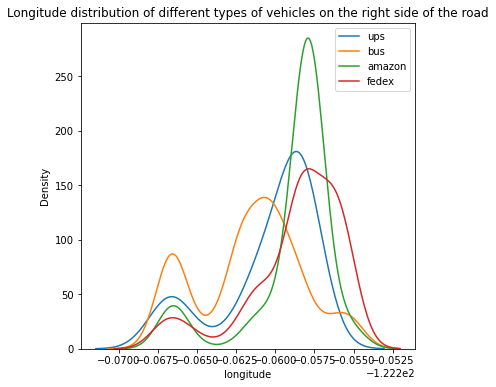

In [48]:
plt.figure(figsize=(6, 6))
l_filter = df[df['longitude'] <= -122.255]
ups = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'right'")
bus = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'right'")
amazon = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right'")
fedex = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'right'")

sns.kdeplot(data = ups['longitude'],  label='ups')
sns.kdeplot(data = bus['longitude'],  label='bus')
sns.kdeplot(data = amazon['longitude'],  label='amazon')
sns.kdeplot(data = fedex['longitude'],  label='fedex')
plt.legend();
plt.title('Longitude distribution of different types of vehicles on the right side of the road')

In [51]:
conditions = [
    ((df['longitude'] >= -122.267864) & (df['longitude'] <= -122.259921)),
    ((df['longitude'] >= -122.259921) & (df['longitude'] <= -122.257163)),
    ((df['longitude'] >= -122.257163) & (df['longitude'] <= -122.254609))]
choices = ['Shattuck', 'Bus Stop', 'College Ave']
df['Segment'] = np.select(conditions, choices, default='none')

In [52]:
df.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,...,box_area,is_on_bus_line,year,month,day,weekday,hour,date,side_of_road,Segment
76,2021-10-04 14:17:14,37.869228,-122.255411,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_492.jpg,fedex_truck,4,0.700000,0.645833,...,0.031959,False,2021,10,4,1,7,2021-10-04,right,College Ave
134,2021-10-04 14:17:25,37.869117,-122.256217,20.9214,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1_827.jpg,fedex_truck,4,0.832812,0.687500,...,0.151398,False,2021,10,4,1,7,2021-10-04,right,College Ave
1958,2021-11-15 16:25:17,37.868503,-122.260597,11.2654,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_631.jpg,bus,1,0.916927,0.526852,...,0.124184,False,2021,11,15,1,8,2021-11-15,right,Shattuck
2021,2021-11-15 16:25:26,37.868431,-122.261094,24.1401,GRMN_Bancroft_1002.MP4,GRMN_Bancroft_1002_900.jpg,fedex_truck,4,0.082813,0.485648,...,0.078979,False,2021,11,15,1,8,2021-11-15,left,Shattuck
2501,2021-11-15 16:52:56,37.868567,-122.260672,22.5308,GRMN_Bancroft_1008.MP4,GRMN_Bancroft_1008_1777.jpg,amazon_truck,6,0.868229,0.483333,...,0.081015,True,2021,11,15,1,8,2021-11-15,right,Shattuck


Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the left side of the road in the Shattuck segment')

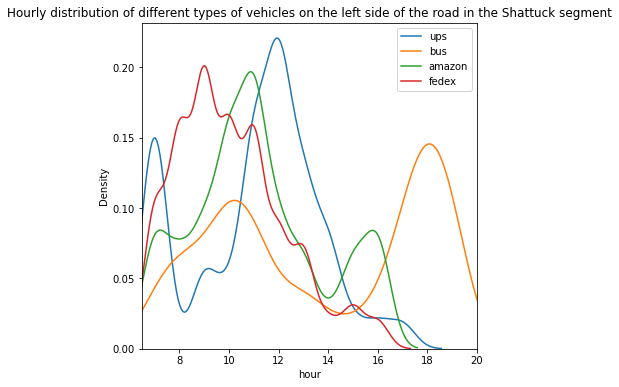

In [54]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'Shattuck'")
bus = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'bus' & side_of_road == 'left' & Segment == 'Shattuck'")
amazon = df[['hour', 'obj_class_name', 'side_of_road', 'Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'Shattuck'")
fedex = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left' & Segment == 'Shattuck'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the left side of the road in the Shattuck segment')

Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the left side of the road in the College Ave segment')

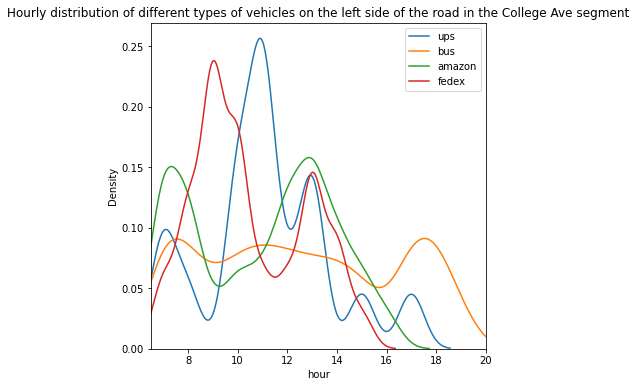

In [55]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'College Ave'")
bus = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'bus' & side_of_road == 'left' & Segment == 'College Ave'")
amazon = df[['hour', 'obj_class_name', 'side_of_road', 'Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'College Ave'")
fedex = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left' & Segment == 'College Ave'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the left side of the road in the College Ave segment')

Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the left side of the road in the Bus Stop segment')

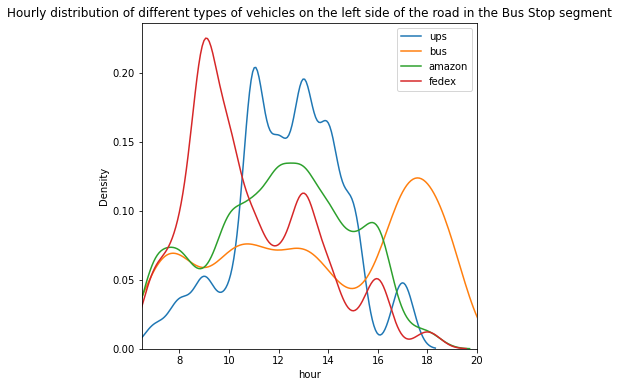

In [56]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")
bus = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'bus' & side_of_road == 'left' & Segment == 'Bus Stop'")
amazon = df[['hour', 'obj_class_name', 'side_of_road', 'Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")
fedex = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the left side of the road in the Bus Stop segment')

Text(0.5, 1.0, 'Hourly distribution of UPS on the left side of the road in various segments')

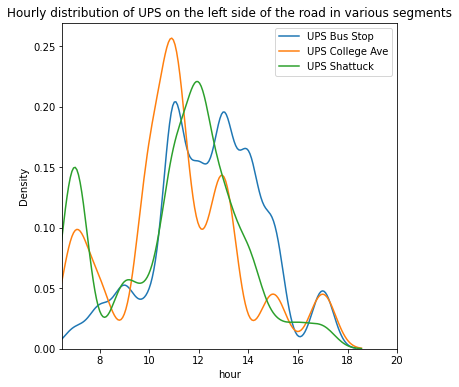

In [58]:
plt.figure(figsize=(6, 6))
ups_bstop = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")
ups_collave = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'College Ave'")
ups_shattuck = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'Shattuck'")


bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups_bstop['hour'], bw=0.2, label='UPS Bus Stop')
sns.kdeplot(data = ups_collave['hour'], bw=0.2, label='UPS College Ave')
sns.kdeplot(data = ups_shattuck['hour'], bw=0.2, label='UPS Shattuck')

plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of UPS on the left side of the road in various segments')

Text(0.5, 1.0, 'Hourly distribution of Amazon on the left side of the road in various segments')

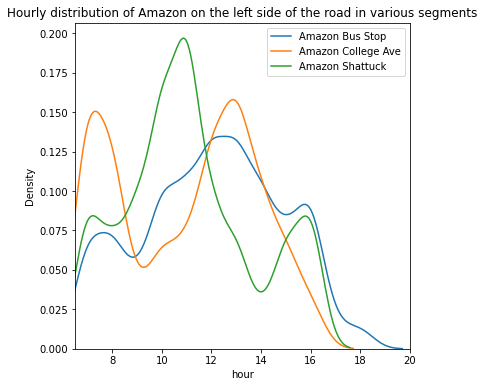

In [59]:
plt.figure(figsize=(6, 6))
amazon_bstop = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")
amazon_collave = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'College Ave'")
amazon_shattuck = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'Shattuck'")


bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = amazon_bstop['hour'], bw=0.2, label='Amazon Bus Stop')
sns.kdeplot(data = amazon_collave['hour'], bw=0.2, label='Amazon College Ave')
sns.kdeplot(data = amazon_shattuck['hour'], bw=0.2, label='Amazon Shattuck')

plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of Amazon on the left side of the road in various segments')

Text(0.5, 1.0, 'Hourly distribution of UPS on the right side of the road in various segments')

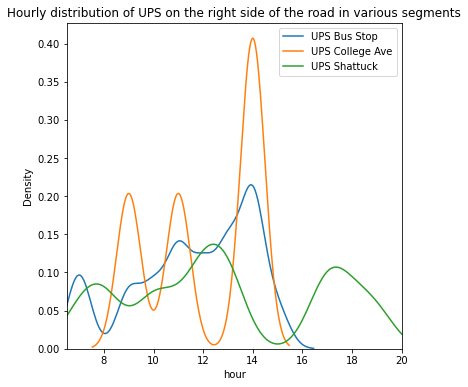

In [60]:
plt.figure(figsize=(6, 6))
ups_bstop = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'right' & Segment == 'Bus Stop'")
ups_collave = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'right' & Segment == 'College Ave'")
ups_shattuck = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'right' & Segment == 'Shattuck'")


bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups_bstop['hour'], bw=0.2, label='UPS Bus Stop')
sns.kdeplot(data = ups_collave['hour'], bw=0.2, label='UPS College Ave')
sns.kdeplot(data = ups_shattuck['hour'], bw=0.2, label='UPS Shattuck')

plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of UPS on the right side of the road in various segments')

Text(0.5, 1.0, 'Hourly distribution of Amazon on the right side of the road in various segments')

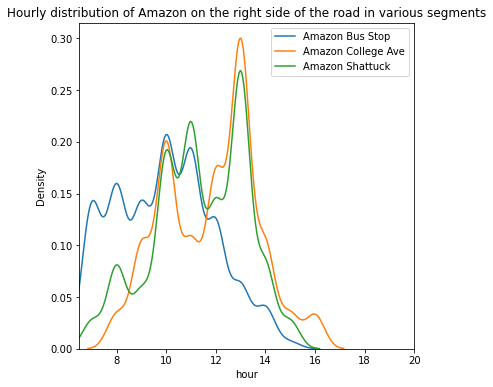

In [61]:
plt.figure(figsize=(6, 6))
amazon_bstop = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right' & Segment == 'Bus Stop'")
amazon_collave = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right' & Segment == 'College Ave'")
amazon_shattuck = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right' & Segment == 'Shattuck'")


bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = amazon_bstop['hour'], bw=0.2, label='Amazon Bus Stop')
sns.kdeplot(data = amazon_collave['hour'], bw=0.2, label='Amazon College Ave')
sns.kdeplot(data = amazon_shattuck['hour'], bw=0.2, label='Amazon Shattuck')

plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of Amazon on the right side of the road in various segments')